In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm

data = pd.read_csv('dataset_caba.csv')


In [2]:
#Convertimos a dummy la disposicion
df_dummies = data

df_dummies = pd.concat([data, pd.get_dummies(data = data['disposicion'], prefix= 'disp_')], axis = 1)

#Convertimos a dummy los barrios
df_dummies = pd.concat([df_dummies, pd.get_dummies(data = data['place_name_normalized'], prefix= 'barrio_place_name_normalized')], axis = 1)

#Convertimos a dummy los barrios
df_dummies = pd.concat([df_dummies, pd.get_dummies(data = data['property_type'], prefix= 'tipo_name_property_type')], axis = 1)



In [3]:
# quitamos columnas 

df_dummies = df_dummies.drop(['Unnamed: 0','lat','lon','property_type','description','title','lat-lon','Point','place_name','place_name_normalized','disposicion'], axis=1)

#Reseteo el index
df_dummies.reset_index(inplace=True, drop=True)



In [4]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [5]:
X = df_dummies.drop(['price_usd_per_m2','rooms','floor'], axis = 1)
y = df_dummies['price_usd_per_m2']

#Separamos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)


MAE:  419.8274270790215
MSE:  468729.38317279756
RMSE: 684.6381403141353
R2:   0.5914080981219418


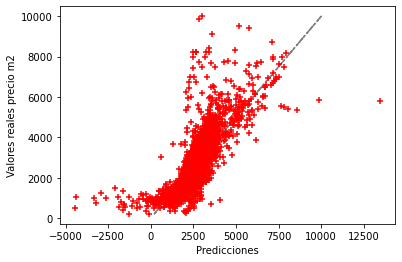

In [6]:

#Instanciamos el modelo
linreg = linear_model.LinearRegression()
#Entrenamos el modelo
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

print ('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:  ', metrics.r2_score(y_test, y_pred))


# Graficamos el modelo
plt.plot(y_test,y_test, '-.', c='grey')
plt.scatter(y_pred, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones")
plt.ylabel("Valores reales precio m2")
plt.show()



                            OLS Regression Results                            
Dep. Variable:       price_usd_per_m2   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     429.2
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:23:05   Log-Likelihood:            -1.2456e+05
No. Observations:               15699   AIC:                         2.492e+05
Df Residuals:                   15640   BIC:                         2.497e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

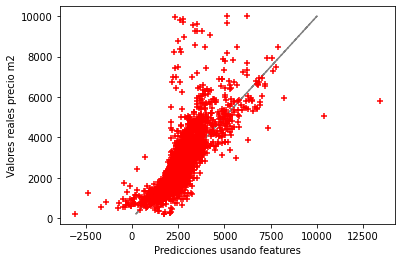

In [7]:
X = df_dummies.drop(['price_usd_per_m2','rooms','floor'], axis = 1)
y = df_dummies['price_usd_per_m2']
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
print (model.summary())
print ('MAE:', metrics.mean_absolute_error(y_test, predictions))
print ('MSE:', metrics.mean_squared_error(y_test, predictions))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

plt.plot(y_test,y_test, '-.', c='grey')
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando features")
plt.ylabel("Valores reales precio m2")
plt.show()

Ridge

MAE:  480.8860702868713
MSE:  539004.9655839315
RMSE: 734.1695754959692
R2:   0.5400899585752067


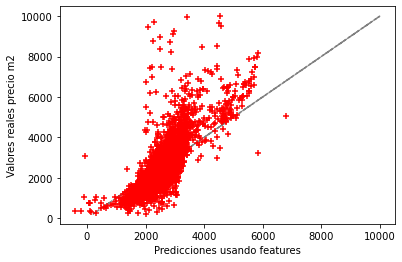

In [8]:
X = df_dummies.drop(['price_usd_per_m2','rooms','floor'], axis = 1)
y = df_dummies['price_usd_per_m2']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
ridgemodel = linear_model.Ridge(alpha= 0.5, normalize=True)
ridgemodel.fit(X_train, y_train)
y_pred = ridgemodel.predict(X_test)   

print ('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:  ', metrics.r2_score(y_test, y_pred))

plt.plot(y_test,y_test, '-.', c='grey')
plt.scatter(y_pred, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando features")
plt.ylabel("Valores reales precio m2")
plt.show()

Lasso

MAE:  411.38550382855675
MSE:  443106.0782233633
RMSE: 665.6621351882375
R2:   0.6247935897384012


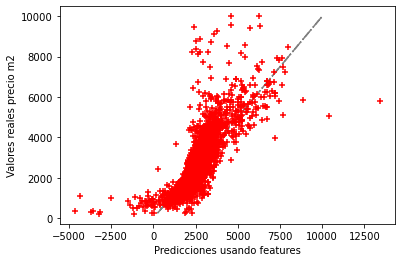

In [9]:
X = df_dummies.drop(['price_usd_per_m2','rooms','floor'], axis = 1)
y = df_dummies['price_usd_per_m2']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
model = linear_model.LassoCV(alphas=np.linspace(0.01,100, 1000), cv=3, normalize=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print ('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:  ', metrics.r2_score(y_test, y_pred))

plt.plot(y_test,y_test, '-.', c='grey')
plt.scatter(y_pred, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando features")
plt.ylabel("Valores reales precio m2")
plt.show()